In [137]:
import pymysql
from sklearn.linear_model import ElasticNet,Lasso,Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline

connect = pymysql.connect(host='127.0.0.1',user = 'root',password='', db='arragement', charset='utf8')
cur = connect.cursor()
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

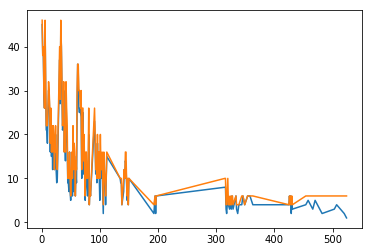

In [138]:
sql = "select lesson_id, sum(max_student), sum(actual_student)  from lesson_distribute where begin_at = '2018-01-24 19:20:00'  group by lesson_id order by lesson_id;"
cur.execute(sql)
data = cur.fetchall()
X = np.array([i[0] for i in data ])
y = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(X,y,label="actual")
plt.plot(X,ym,label="max")
plt.show()

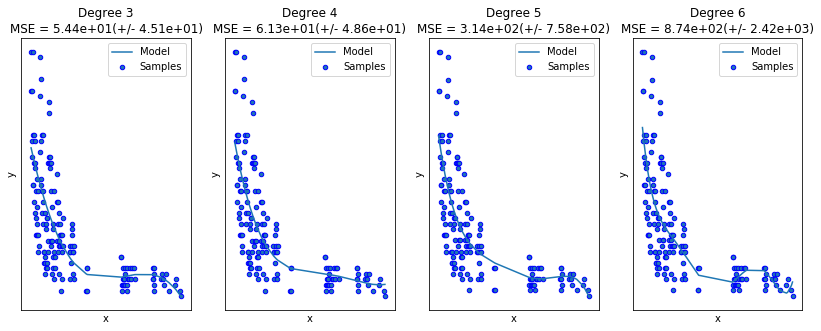

In [139]:
from sklearn.externals import joblib
n_samples = 30
degrees = [ 3, 4, 5 , 6]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
   
    #joblib.dump(pipeline, 'sch_%d.pkl' % i)
    #clf = joblib.load('filename.pkl') 

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 160)
    plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [153]:
pipeline.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

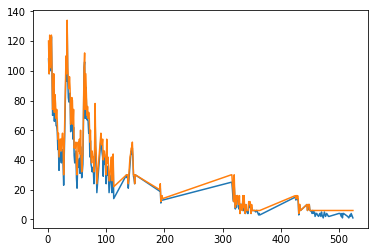

In [140]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y-%m-%d') = '2018-01-24'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

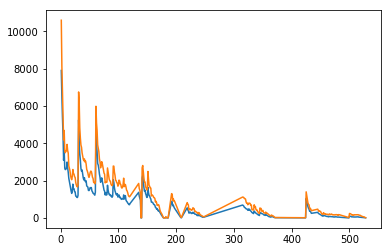

In [141]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y-%m') = '2018-01'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

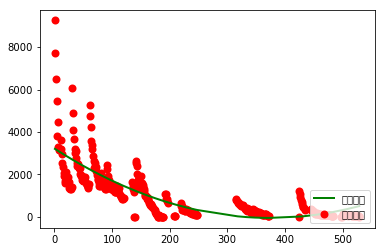

In [142]:
model = make_pipeline(PolynomialFeatures(2), Lasso())
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

In [143]:
np.mean(ya)

Decimal('878.9008746355685131195335277')

In [144]:
np.sum(ya)

Decimal('301463')

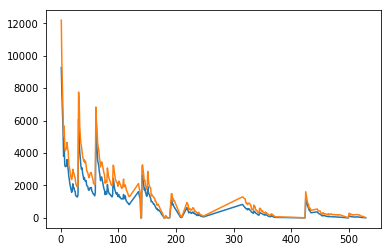

In [145]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y') = '2018'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

线性回归

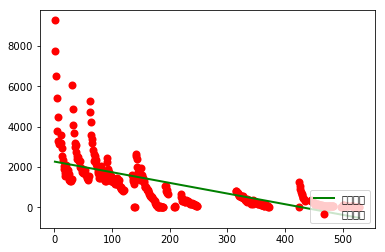

In [146]:
model = linear_model.LinearRegression()
Xi = x.reshape(-1,1)
Yi = ya.reshape(-1,1)
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

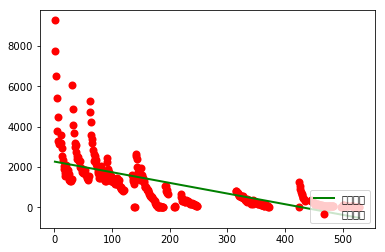

In [147]:

from sklearn.preprocessing import PolynomialFeatures

model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

In [148]:
alphas = np.logspace(-10, -2, 200)
alphas

array([  1.00000000e-10,   1.09698580e-10,   1.20337784e-10,
         1.32008840e-10,   1.44811823e-10,   1.58856513e-10,
         1.74263339e-10,   1.91164408e-10,   2.09704640e-10,
         2.30043012e-10,   2.52353917e-10,   2.76828663e-10,
         3.03677112e-10,   3.33129479e-10,   3.65438307e-10,
         4.00880633e-10,   4.39760361e-10,   4.82410870e-10,
         5.29197874e-10,   5.80522552e-10,   6.36824994e-10,
         6.98587975e-10,   7.66341087e-10,   8.40665289e-10,
         9.22197882e-10,   1.01163798e-09,   1.10975250e-09,
         1.21738273e-09,   1.33545156e-09,   1.46497140e-09,
         1.60705282e-09,   1.76291412e-09,   1.93389175e-09,
         2.12145178e-09,   2.32720248e-09,   2.55290807e-09,
         2.80050389e-09,   3.07211300e-09,   3.37006433e-09,
         3.69691271e-09,   4.05546074e-09,   4.44878283e-09,
         4.88025158e-09,   5.35356668e-09,   5.87278661e-09,
         6.44236351e-09,   7.06718127e-09,   7.75259749e-09,
         8.50448934e-09,

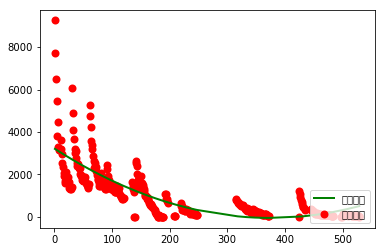

In [149]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(PolynomialFeatures(2), ElasticNet())
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

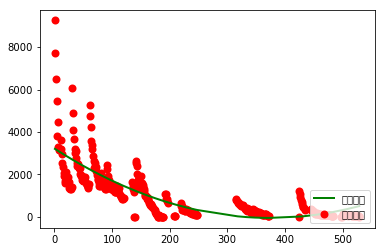

In [150]:
from sklearn.linear_model import ElasticNet,Lasso
model = make_pipeline(PolynomialFeatures(2), Lasso())
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()